In [1]:
using Pkg
Pkg.activate("/home/julisn/Codes/Dispersions.jl/")
using Dispersions
using LinearAlgebra
using Plots

  Activating project at `~/Codes/Dispersions.jl`
[ Info: Precompiling Dispersions [9451dd48-6b2a-4bde-a443-9ec270a37806]


# Symmetry Points
## BCC

$ \Gamma = (0,0,0); \quad H = (0,0,2\pi); \quad P = (\pi,\pi,\pi); \quad N = (0, \pi, \pi)$

In [13]:
gen_sampling_test(D::Int, Ns::Int) =
    Base.product([[(2 * π / Ns) * j for j = 0:Ns-1] for Di = 1:D]...)

basis_transform_test(v::Tuple) =
    Tuple(transpose([1.0 1.0 0.0; 0.0 1.0 1.0; 1.0 0.0 1.0]) * collect(v))

findnearest(p, A::AbstractArray) = findmin(map(vi -> norm(vi .- p),A))

"""
    map_to_indices_full(path::AbstractVector, grid::AbstractArray)

Finds indices for points along path. 
Also returns residual values for points, i.e. norm of distance vector between point on path and point in grid.
"""
function map_to_indices_full(path::AbstractVector, grid::AbstractArray)
    result_points = Array{CartesianIndex,1}(undef, length(path))
    residual_vals = Array{Float64,1}(undef, length(path))
    for (i,point) in enumerate(path)
        residual_vals[i], result_points[i] = findnearest(point, grid)
    end
    return result_points, residual_vals
end

"""
    map_to_indices(path::AbstractVector, grid::AbstractArray, kG::KGrid)

Finds indices for points along path for reduced k-grid. 
Also returns residual values for points, i.e. norm of distance vector between point on path and point in grid.
"""
function map_to_indices(path::AbstractVector, grid::AbstractArray, kG::KGrid)
    result_points, residual_vals = map_to_indices_full(path, grid)
    rr = map(pi -> findfirst(ki_l -> pi in ki_l, kG.expand_perms), result_points)
    return rr, residual_vals
end


function sample_along_path(data::AbstractArray, path::AbstractVector, kG::KGrid)
    sampling = gen_sampling(grid_type(kG), grid_dimension(kG), kG.Ns)
    grid = map(v -> basis_transform(grid_type(kG), v), sampling);
    result_points, residual_vals = map_to_indices(path, grid, kG)
    return data[rr], residual_vals
end

sample_along_path (generic function with 1 method)

In [17]:
grid_dimension(kG_bcc)

3

In [3]:
## Symm Points

Γ_v = (0,0,0)
H_v = (0,0,2π)
P_v = (π,π,π)
N_v = (0,π,π)
Γ_bv = 2π .* (0,0,0)
H_bv = 2π .* (-1/2,1/2,1/2)
P_bv = 2π .* (1/4,1/4,1/4)
N_bv = 2π .* (0,1/2,0)

## Symm Lines

symm_path_samples = 20
Δ = [2π .* (-v, v, v) for v in LinRange(0,0.5,symm_path_samples)]
Λ = [2π .* ( v, v, v) for v in LinRange(0,0.25,symm_path_samples)]
Σ = [2π .* ( 0, v, 0) for v in LinRange(0,0.5,symm_path_samples)]
F = [2π .* (-0.5+3v,0.5-v,0.5-v) for v in LinRange(0,0.25,symm_path_samples)]
D = [2π .* ( v,0.5-v, v) for v in LinRange(0,0.25,symm_path_samples)]
G = [2π .* (-v,0.5, v) for v in LinRange(0,0.5,symm_path_samples)]

Ns = 30
kG_bcc = gen_kGrid("bcc-1.23",Ns)
symm_points_bcc = [Γ_bv, H_bv, P_bv, N_bv]
symm_paths_bcc  = [Δ, Λ, Σ, F, D, G];

In [4]:
kG_bcc.kGrid
GT = Dispersions.cI
sampling_bcc = gen_sampling_test(3, Ns)
kGrid_f = map(v -> basis_transform_test(v), sampling_bcc);
symm_points_bcc_test = map(v -> basis_transform_test(v), symm_points_bcc)
symm_paths_bcc_test  = map(path -> map(basis_transform_test, path), symm_paths_bcc);

In [5]:
symm_points_bcc_indices, symm_points_bcc_resvals =  map_to_indices(symm_points_bcc_test, kGrid_f)
symm_paths_bcc_indices, symm_paths_bcc_resvals   =  map(pi -> map_to_indices(pi, kGrid_f), symm_paths_bcc_test);

LoadError: MethodError: no method matching map_to_indices(::Vector{Tuple{Float64, Float64, Float64}}, ::Array{Tuple{Float64, Float64, Float64}, 3})

[0mClosest candidates are:
[0m  map_to_indices(::AbstractVector, ::AbstractArray, [91m::KGrid[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[2]:30[24m[39m


In [6]:
rr, residual_vals = map_to_indices(D, kGrid_f, kG_bcc);
println("cumulative error: $(sum(residual_vals))")

cumulative error: 13.326379274531432


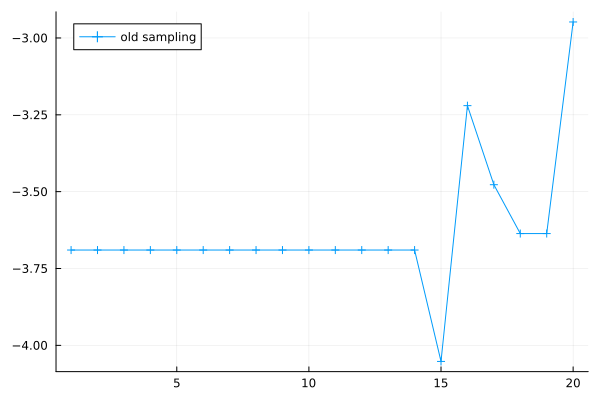

In [24]:
xlabels = map(x-> "$(round.(x,digits=1))", kG_bcc.kGrid[1:5:end])
plot(kG_bcc.ϵkGrid[rr], label="old sampling", markershape=:auto)
#plot!(xticks = (rr[1:5:end], xlabels))

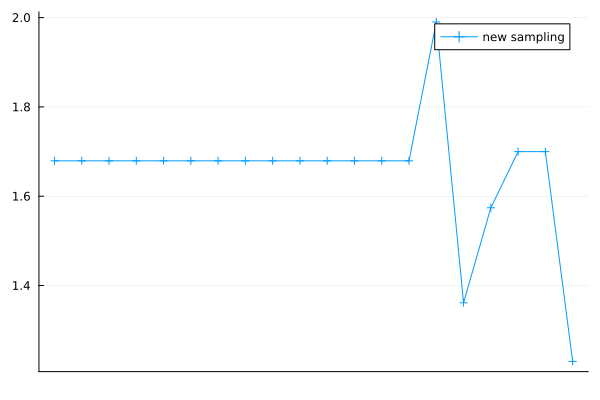

In [7]:
xlabels = map(x-> "$(round.(x,digits=1))", kG_bcc.kGrid[1:5:end])
plot(kG_bcc.ϵkGrid[rr], label="new sampling", markershape=:auto)
plot!(xticks = (rr[1:5:end], xlabels))